In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pandas as pd
import random
from sklearn.preprocessing import MinMaxScaler


sys.path.append(os.path.abspath('../src/'))
from ActivationFunctions import *
from NeuralNetwork import *
from nn_utils import *

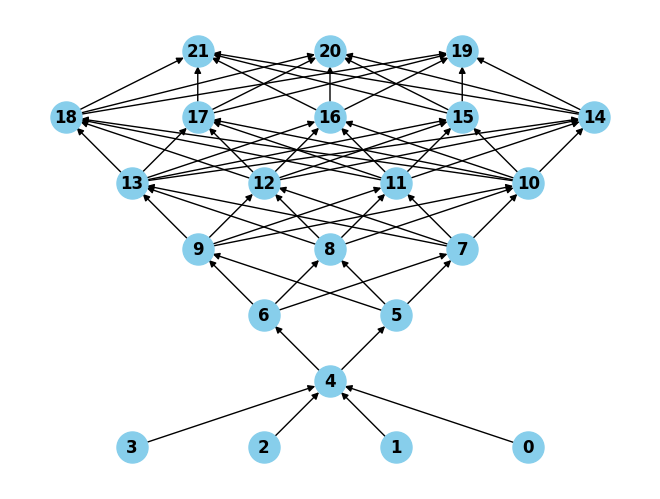

In [2]:
topology_complex = create_topology(4, [1,2,3,4,5], 3)
NeuralNetwork.display_topology(topology_complex)

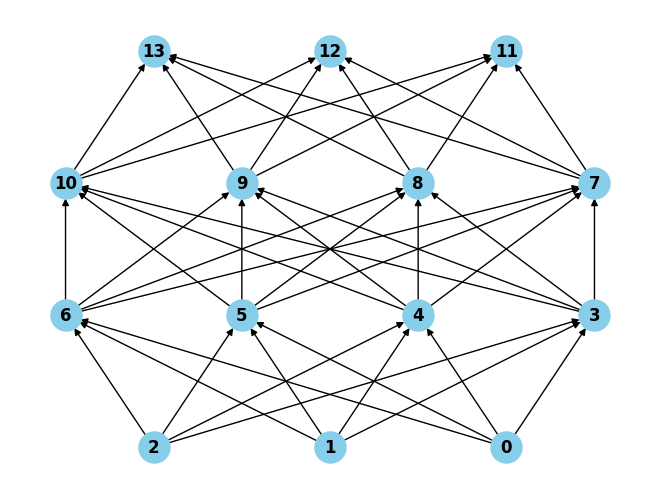

In [3]:
topology_1 = create_topology(3, [4,4], 2)
NeuralNetwork.display_topology(topology_1)

In [4]:
topology_1

{0: ['input', 'None', [], [3, 4, 5, 6]],
 1: ['input', 'None', [], [3, 4, 5, 6]],
 2: ['input', 'None', [], [3, 4, 5, 6]],
 3: ['hidden_0', 'sigmoid', [0.5], [7, 8, 9, 10]],
 4: ['hidden_0', 'sigmoid', [0.5], [7, 8, 9, 10]],
 5: ['hidden_0', 'sigmoid', [0.5], [7, 8, 9, 10]],
 6: ['hidden_0', 'sigmoid', [0.5], [7, 8, 9, 10]],
 7: ['hidden_1', 'sigmoid', [0.5], [11, 12, 13]],
 8: ['hidden_1', 'sigmoid', [0.5], [11, 12, 13]],
 9: ['hidden_1', 'sigmoid', [0.5], [11, 12, 13]],
 10: ['hidden_1', 'sigmoid', [0.5], [11, 12, 13]],
 11: ['output', 'identity', [], []],
 12: ['output', 'identity', [], []],
 13: ['output', 'identity', [], []]}

In [5]:
NN = NeuralNetwork(topology_1, -0.75, 0.75, True, RANDOM_STATE)

In [6]:
tr_input = 3
tr_output = 2
len_dataset = 1000

f1 = lambda x : x[2]*2 + x[1]*3 - x[0] - 50
f2 = lambda x : x[2]*1.3 - x[1]**2 + x[0]*3 + 25

tr = create_dataset(len_dataset, tr_input, [0, 100, 1], [f1, f2], RANDOM_STATE)
tr.sample(10, random_state=RANDOM_STATE)

,input_1,input_2,input_3,output_1,output_2
144,15.0,21.0,27.0,52.0,-335.9
833,42.0,17.0,4.0,-33.0,-132.8
270,96.0,7.0,33.0,-59.0,306.9
468,65.0,34.0,83.0,153.0,-828.1
962,80.0,17.0,8.0,-63.0,-13.6
186,50.0,63.0,17.0,123.0,-3771.9
942,35.0,77.0,7.0,160.0,-5789.9
516,12.0,80.0,52.0,282.0,-6271.4
286,61.0,47.0,15.0,60.0,-1981.5
458,60.0,83.0,96.0,331.0,-6559.2


In [7]:
scaler_out = MinMaxScaler()
scaler_in = MinMaxScaler()
scaler_in.fit(tr.values[:,:tr_input])
scaler_out.fit(tr.values[:,tr_input:])
tr_normalized = np.empty((len_dataset, tr_output+tr_input))
tr_normalized[:,:tr_input] = scaler_in.transform(tr.values[:,:tr_input])
tr_normalized[:,tr_input:] = scaler_out.transform(tr.values[:,tr_input:])

In [8]:
tr_normalized

array([[0.53535354, 0.93939394, 0.01010101, 0.54428044, 0.12279247],
       [0.38383838, 0.47474747, 0.24242424, 0.40221402, 0.75703103],
       [0.34343434, 0.72727273, 0.55555556, 0.66236162, 0.46614545],
       ...,
       [0.49494949, 0.53535354, 0.14141414, 0.37822878, 0.69977592],
       [0.03030303, 0.35353535, 0.81818182, 0.61070111, 0.85111697],
       [0.97979798, 0.        , 0.58585859, 0.15867159, 0.99692994]])

In [9]:
training_set = tr.values

batch_size = int(len_dataset/10)
max_epochs = 1000
error_decrease_tolerance = 0.000001
patience = 10

learning_rate = 0.01/batch_size
lambda_tikhonov = 0.00001
alpha_momentum = 0.05

stats = NN.train_2(tr_normalized, batch_size, max_epochs, error_decrease_tolerance, patience, 
                   learning_rate, lambda_tikhonov, alpha_momentum)

IndexError: index -3 is out of bounds for axis 0 with size 2

In [ ]:
predictions = scaler_out.inverse_transform(NN.predict_array(tr_normalized[:,:tr_input]))
predictions

array([[  142.83480021, -2777.98177041],
       [  131.33966639, -2363.90289515],
       [  131.0656159 , -2353.38444909],
       ...,
       [  131.51596493, -2370.13206797],
       [  127.28796823, -2217.52896871],
       [  112.42391726, -1681.07401855]])

In [ ]:
for key in list(stats.keys())[:9]:
    print(key, ':', stats[key])

training_set_len : 1000
minibatch_size : 100
max_epochs : 1000
error_decrease_tolerance : 1e-06
patience : 10
learning_rate : 0.0001
lambda_tikhonov : 1e-05
alpha_momentum : 0.05
epochs : 1000


In [ ]:
stats['training_error']

[0.14685630170403038,
 0.12753884869538626,
 0.12346775726442626,
 0.12367502298307849,
 0.12301678664092865,
 0.12156205917575073,
 0.12223308899560249,
 0.12287786551206814,
 0.12157724680648258,
 0.12175365323585423,
 0.12290412702656821,
 0.12188150777472237,
 0.121560697892976,
 0.12271695248480373,
 0.12223816684685346,
 0.12154566122990414,
 0.12237322278727368,
 0.12252403422207016,
 0.12165142708874294,
 0.12202084005659004,
 0.12264257307163993,
 0.12184503382885487,
 0.12177749703888767,
 0.12256282234609649,
 0.12208399558845502,
 0.12167976077907042,
 0.1223357291345697,
 0.1222947837171914,
 0.12170717966519257,
 0.12206540997977589,
 0.12240016225297355,
 0.12182429360711189,
 0.12185078884422082,
 0.12236363887254753,
 0.12198691521023887,
 0.12174087807217149,
 0.12221065663672964,
 0.12213537384941359,
 0.12173502567731995,
 0.12201228829809095,
 0.12221038706561191,
 0.12180683815301263,
 0.12184375636304963,
 0.12218287740296498,
 0.1219165018586485,
 0.121749010431

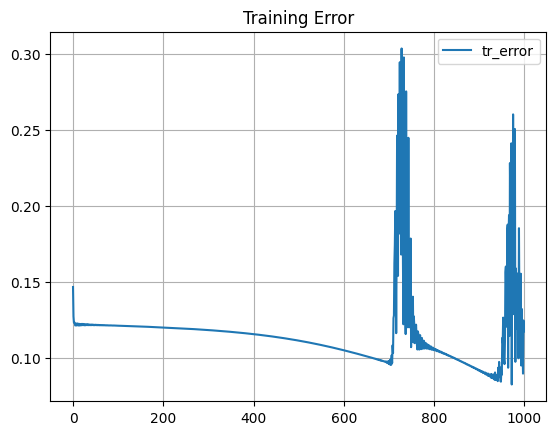

In [ ]:
multy_plot([stats['training_error']], ['tr_error'], 'Training Error')

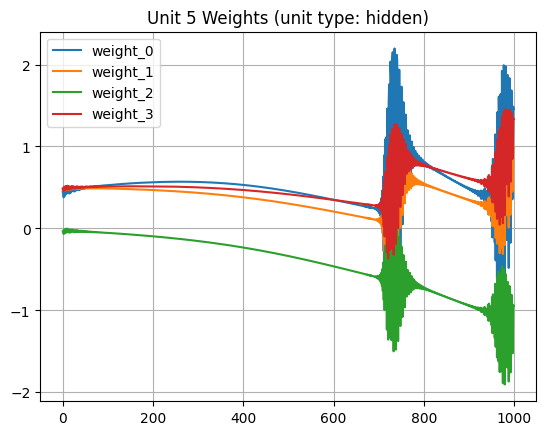

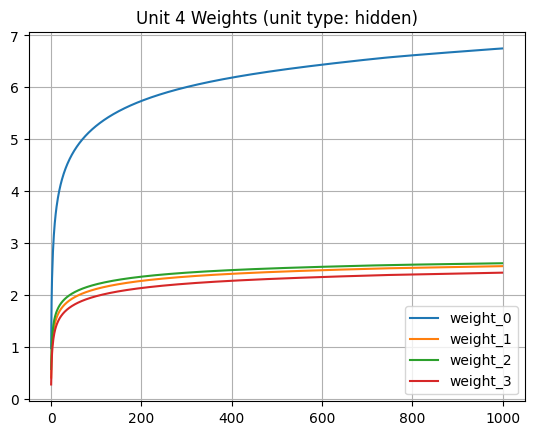

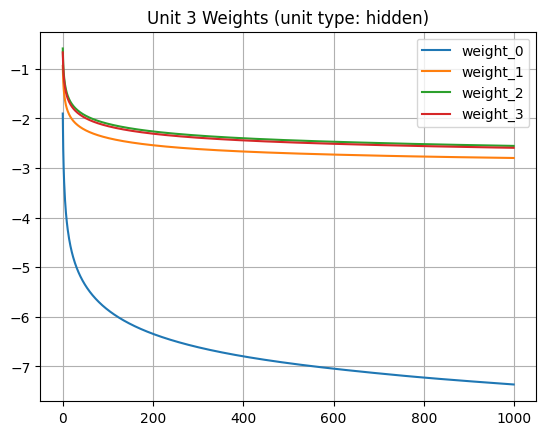

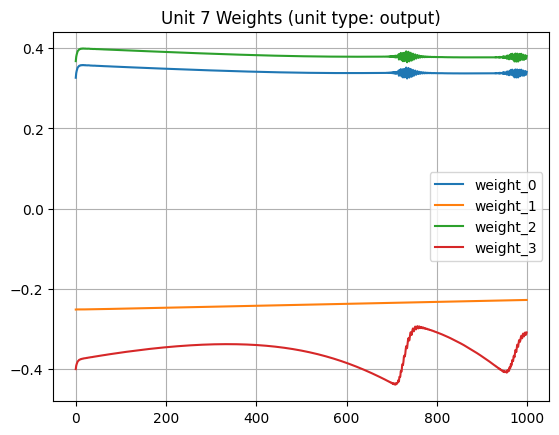

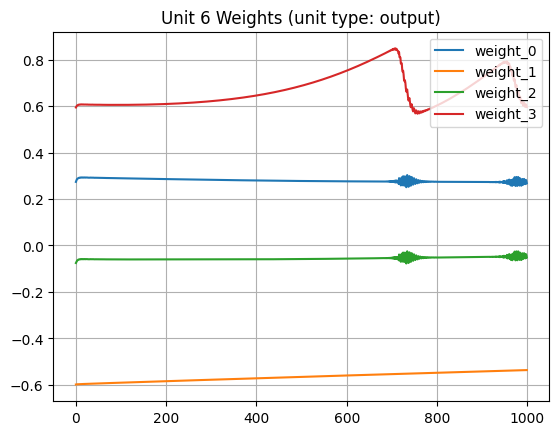

In [ ]:
for unit_index in stats['units_weights'].keys():
    vals = np.array(stats['units_weights'][unit_index]).T
    multy_plot(vals, 
               ['weight_' + str(i) for i in range(len(vals))], 
               'Unit ' + str(unit_index) + ' Weights (unit type: ' + NN.neurons[unit_index].type + ')')

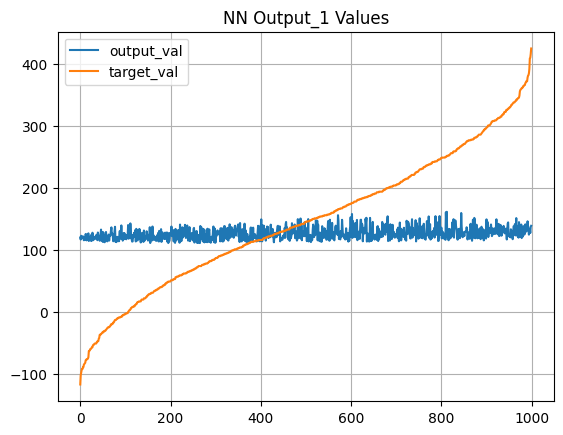

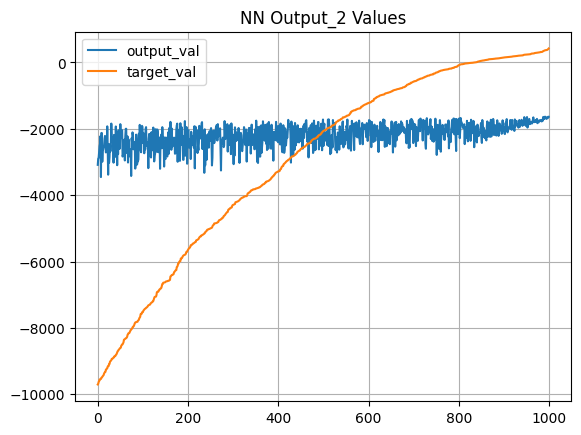

In [ ]:
for i in range(tr_output):
    sorted_order = training_set[:, tr_input + i].argsort()
    multy_plot([predictions[sorted_order][:,i] , training_set[sorted_order][:,tr_input + i]], 
                ['output_val', 'target_val'], 
                'NN Output_' + str(i + 1) +  ' Values')

In [ ]:
NN.predict(np.array([10,20,30]))

array([0.41270101, 0.812807  ])

In [ ]:
NN.predict(np.array([50,-20,1]))

array([0.41270101, 0.812807  ])